In [1]:
import pandas as pd
import os

# 상위 디렉토리로 이동하여 kmrd 폴더에 접근
data_dir = '../kmrd/kmr_dataset/datafile/kmrd-small'
movie_df = pd.read_csv(os.path.join(data_dir, 'movies.txt'), sep='\t')
# 평점 데이터 로드
rates_df = pd.read_csv(os.path.join(data_dir, 'rates.csv'))
# 출연진 데이터 로드
castings_df = pd.read_csv(os.path.join(data_dir, 'castings.csv'))
# 인물 데이터 로드
peoples_df = pd.read_csv(os.path.join(data_dir, 'peoples.txt'), sep='\t')
# 제작 국가 데이터 로드
countries_df = pd.read_csv(os.path.join(data_dir, 'countries.csv'))
# 장르 데이터 로드
genres_df = pd.read_csv(os.path.join(data_dir, 'genres.csv'))


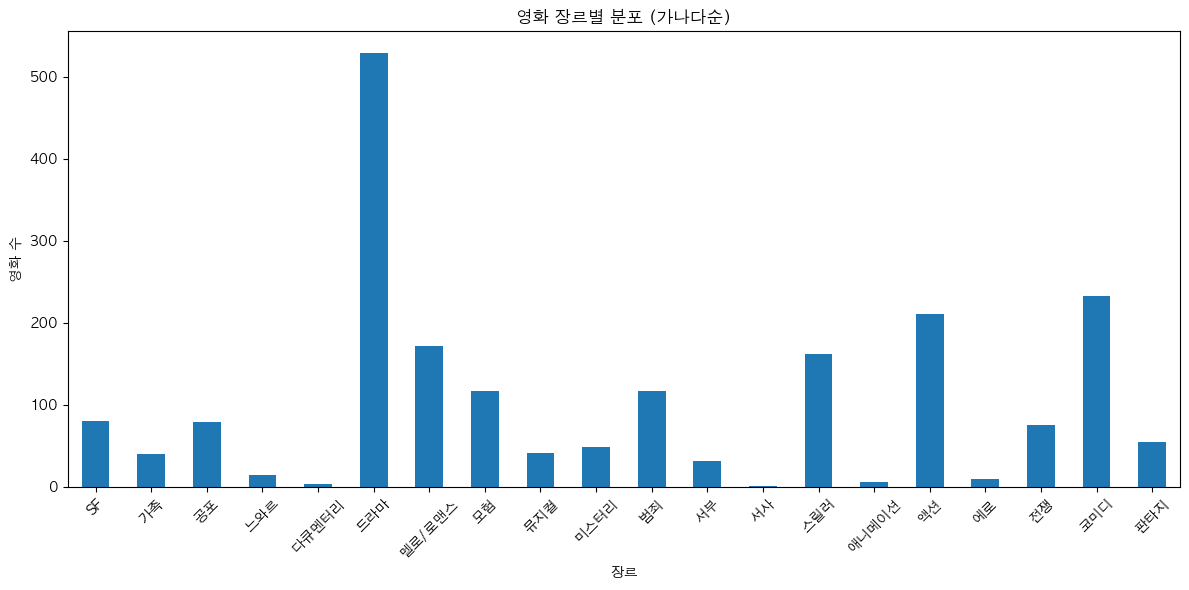

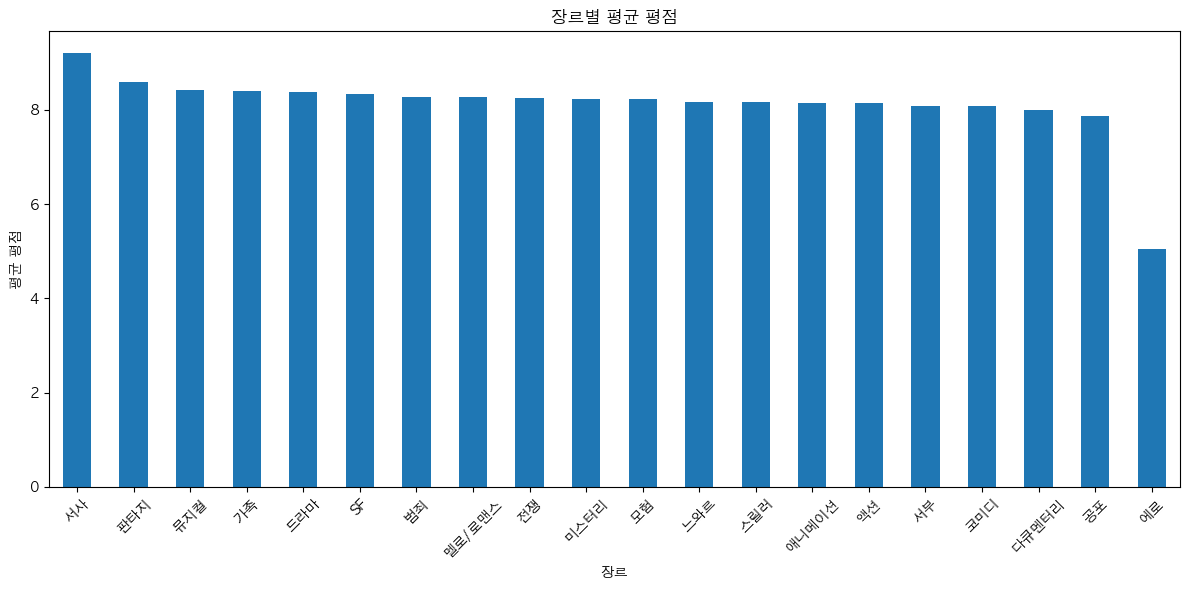


장르별 평균 평점:
genre
서사        9.209619
판타지       8.597665
뮤지컬       8.427360
가족        8.399998
드라마       8.389174
SF        8.339308
범죄        8.281757
멜로/로맨스    8.269356
전쟁        8.247834
미스터리      8.235190
모험        8.222950
느와르       8.169080
스릴러       8.165101
애니메이션     8.153786
액션        8.152268
서부        8.083680
코미디       8.081736
다큐멘터리     8.000000
공포        7.868988
에로        5.043875
Name: rate, dtype: float64


In [11]:
from matplotlib import rc
import matplotlib.pyplot as plt

# 한글 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 영화와 장르 데이터를 병합하여 장르별 영화 수 계산
genre_distribution = pd.merge(movie_df, genres_df, on='movie')['genre'].value_counts()

# 장르를 가나다순으로 정렬
genre_distribution_sorted = genre_distribution.sort_index()

# 가나다순 시각화
plt.figure(figsize=(12, 6))
genre_distribution_sorted.plot(kind='bar')
plt.title('영화 장르별 분포 (가나다순)')
plt.xlabel('장르')
plt.ylabel('영화 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 영화별 평균 평점 계산
movie_avg_ratings = rates_df.groupby('movie')['rate'].mean()

# 장르별 평균 평점을 계산하기 위해 영화-장르 데이터와 병합
genre_ratings = pd.merge(genres_df, movie_avg_ratings.reset_index(), on='movie')

# 장르별 평균 평점 계산
genre_avg_ratings = genre_ratings.groupby('genre')['rate'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
genre_avg_ratings.plot(kind='bar')
plt.title('장르별 평균 평점')
plt.xlabel('장르')
plt.ylabel('평균 평점')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 장르별 평균 평점 출력
print("\n장르별 평균 평점:")
print(genre_avg_ratings)
